In [1]:
import pandas as pd
import numpy as np
import os
import glob

pd.options.display.max_columns = None
pd.options.display.max_rows = None

inpath = '/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/'
outpath = '/MFMDatasets/MFM_bopf/src/multi_predict/results/'
#out_flag = True
out_flag = False

alg = "LR"
CUTOFF = 0.005
#alg_cols = ['target','under_alg','sample_tts','p_C','p_solver','seed','precision_macro','recall_macro','F1_macro','PR_AUC','ROC_AUC','MCC']
alg_cols = ['target','under_alg','sample_tts','p_C','p_solver','seed','precision_macro','recall_macro','F1_macro','PR_AUC','ROC_AUC','ROC_Pred','MCC']

#alg = "NB"
#alg_cols = ['target','under_alg','p_var_smoothing','seed','ROC_AUC','MCC']

#alg = "SVC"
#ROC_CUTOFF = 0.790
#alg_cols = ['target','under_alg','sample_tts','TP','FN','FP','TN','p_C','p_kernel','p_degree','seed','precision_macro','recall_macro','F1_macro','PR_AUC','ROC_AUC','MCC']
#alg_cols = ['target','under_alg','p_C','p_kernel','p_degree','seed','precision_macro','recall_macro','F1_macro','PR_AUC','ROC_AUC','MCC']
#alg_cols = ['CLF_time(min)','target','under_alg','p_C','p_kernel','p_degree','p_gamma','seed','ROC_AUC','MCC']

#alg = "MLP"
#ROC_CUTOFF = 0.805
#ROC_CUTOFF = 0.80
#alg_cols = ['target','under_alg','p_activation','p_alpha','p_hidden_layer_sizes','p_random_state','p_solver','seed','ROC_AUC','MCC']
#alg_cols = ['target','sample_tts','p_activation','p_alpha','p_hidden_layer_sizes','seed','p_solver','precision_macro','recall_macro','F1_macro','PR_AUC','ROC_AUC','MCC']

#alg = "RF"
#ROC_CUTOFF = 0.805
#alg_cols = ['target','under_alg','seed','p_n_estimators','p_max_depth','p_min_samples_leaf','p_min_samples_split','ROC_AUC','MCC']
#alg_cols = ['target','under_alg','seed','p_n_estimators','p_max_depth','p_min_samples_leaf','p_min_samples_split','precision_macro','recall_macro','F1_macro','PR_AUC','ROC_AUC','MCC']
#alg_cols = ['target','under_alg','sample_tts','seed','p_n_estimators','p_max_depth','p_min_samples_leaf','p_min_samples_split','precision_macro','recall_macro','F1_macro','acc','PR_AUC','ROC_AUC','MCC']

#alg = "GB"
#ROC_CUTOFF = 0.805
#alg_cols = ['target','under_alg','sample_tts','seed','p_random_state','p_n_estimators','p_max_depth','p_subsample','p_learning_rate','precision_macro','recall_macro','F1_macro','acc','PR_AUC','ROC_AUC','MCC']

os.chdir(inpath + alg + '/output')
#os.chdir(inpath + alg + '/Oct2020/output')
#os.chdir(inpath + alg + '/Nov2020/output')

#dataset = "transfus_yes"
#dataset = "Hysterectomy"
dataset = "*"
#dataset = "trans*"
ext = '.csv'
glob_string = dataset + "*-" + alg + "-*"
files = glob.glob(glob_string + ext)
#files = glob.glob("*-" + alg + "-*" + ext)
#files = glob.glob("transfus_yes*-" + alg + "-*" + ext)

results_df = pd.DataFrame()
#os.chdir('/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output')
#os.chdir('/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output')
#os.chdir('/MFMDatasets/MFM_bopf/src/multi_predict/NB/output')
#files = glob.glob("*-NB-*.csv")
#files = glob.glob("*-MLP-*.csv")
#files = glob.glob("*-SVC-*.csv")
#files = glob.glob("transfus_yes*-MLP-*.csv")
#files = glob.glob("transfus_yes*-MLP-*]_0.*_500*.csv")
#files = glob.glob("transfus_hyster*-MLP-*.csv")
#files = glob.glob("transfus_yes*-MLP-*.csv")
#files = glob.glob("transfus_yes*-MLP-*.csv")
len(files)

54

In [2]:
files = sorted(files, reverse=True)
for i in range(len(files)-1):
    if files[i][:-20] == files[i+1][:-20]:
        print(f'DUP:{files[i]}')
print(f'len(files) = {len(files)}')

len(files) = 54


In [3]:
prev_f = ""
for idx, f in enumerate(files):
    print(f'idx={idx}; file={f}')
    if prev_f[:-20] == f[:-20]:   #if the filenames only differ by timestamp
        print(f'DUP:{prev_f}')
        continue   #skip "duplicate"
        
    if results_df.empty:
        results_df = pd.read_csv(f, header=None, index_col=0, names=[idx])
    else:
        this_df = pd.read_csv(f, header=None, index_col=0, names=[idx])
        results_df = results_df.merge(this_df, left_index=True, right_index=True, how="right")
    prev_f = f
results_df

idx=0; file=transfus_yes-1-NONE-LR-1_10000000_7_liblinear-1-1.0-20210105_085256.csv
idx=1; file=transfus_yes-1-NONE-LR-1_10000000_7_lbfgs-1-1.0-20210105_085717.csv
idx=2; file=transfus_yes-1-NONE-LR-10_10000000_7_liblinear-1-1.0-20210105_085312.csv
idx=3; file=transfus_yes-1-NONE-LR-10_10000000_7_lbfgs-1-1.0-20210105_085556.csv
idx=4; file=transfus_yes-1-NONE-LR-100_10000000_7_liblinear-1-1.0-20210105_085317.csv
idx=5; file=transfus_yes-1-NONE-LR-100_10000000_7_lbfgs-1-1.0-20210105_085645.csv
idx=6; file=transfus_yes-1-NONE-LR-1000_10000000_7_liblinear-1-1.0-20210105_085326.csv
idx=7; file=transfus_yes-1-NONE-LR-1000_10000000_7_lbfgs-1-1.0-20210105_085719.csv
idx=8; file=transfus_yes-1-NONE-LR-10000_10000000_7_liblinear-1-1.0-20210105_085308.csv
idx=9; file=transfus_yes-1-NONE-LR-10000_10000000_7_lbfgs-1-1.0-20210105_085739.csv
idx=10; file=transfus_yes-1-NONE-LR-100000_10000000_7_liblinear-1-1.0-20210105_085345.csv
idx=11; file=transfus_yes-1-NONE-LR-100000_10000000_7_lbfgs-1-1.0-2021

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
CLF_time(min),0.864,5.200,1.098,3.820,1.147,4.611,1.264,5.118,0.889,5.360,1.413,4.856,0.667,4.345,0.014,0.644,0.033,0.552,0.047,0.683,0.039,0.565,0.057,0.620,0.053,0.540,0.017,0.490,0.026,0.214,0.032,0.161,0.026,0.088,0.035,0.588,0.051,0.677,0.073,0.673,0.061,0.646,0.069,0.664,0.118,0.619,0.011,0.528,0.016,0.069,0.026,0.036,0.022,0.042
target,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes
under_alg,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3
pred_alg,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR
seed,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
samp_strat,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
sample_tts,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
p_C,1,1,10,10,100,100,1000,1000,10000,10000,100000,100000,0.1,0.1,1,1,10,10,100,100,1000,1000,10000,10000,100000,100000,0.1,0.1,0.01,0.01,0.001,0.001,0.0001,0.0001,1,1,10,10,100,100,1000,1000,10000,10000,100000,100000,0.1,0.1,0.01,0.01,0.001,0.001,0.0001,0.0001
p_max_iter,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000
p_random_state,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [4]:
results_T = results_df.T
results_T.sort_values(by=['ROC_AUC'], ascending=False, inplace=True)
#results_T.sort_values(by=['PR_AUC'], ascending=False, inplace=True)
small = results_T[alg_cols]
small

,target,under_alg,sample_tts,p_C,p_solver,seed,precision_macro,recall_macro,F1_macro,PR_AUC,ROC_AUC,ROC_Pred,MCC
24,transfus_yes,RAND,0,100000,liblinear,1,0.5425,0.8089,0.5083,0.1129,0.8457,0.8089,0.2292
10,transfus_yes,NONE,1,100000,liblinear,1,0.8195,0.5032,0.4993,0.1192,0.8456,0.5032,0.0637
1,transfus_yes,NONE,1,1,lbfgs,1,0.8076,0.5029,0.4987,0.1192,0.8455,0.5029,0.0593
26,transfus_yes,RAND,0,0.1,liblinear,1,0.5426,0.8080,0.5092,0.1109,0.8455,0.8080,0.2290
14,transfus_yes,RAND,0,1,liblinear,1,0.5425,0.8088,0.5085,0.1137,0.8455,0.8088,0.2292
27,transfus_yes,RAND,0,0.1,lbfgs,1,0.5426,0.8082,0.5091,0.1111,0.8454,0.8082,0.2291
22,transfus_yes,RAND,0,10000,liblinear,1,0.5426,0.8091,0.5086,0.1130,0.8454,0.8091,0.2294
7,transfus_yes,NONE,1,1000,lbfgs,1,0.8323,0.5029,0.4987,0.1190,0.8454,0.5029,0.0617
9,transfus_yes,NONE,1,10000,lbfgs,1,0.8076,0.5029,0.4987,0.1190,0.8454,0.5029,0.0593
13,transfus_yes,NONE,1,0.1,lbfgs,1,0.8361,0.5022,0.4974,0.1177,0.8453,0.5022,0.0547


In [5]:
if out_flag:
    if dataset == '*':
        small.to_csv(outpath + alg + '-ALL-ROC-Results.csv')
    elif dataset == 'trans*':
        small.to_csv(outpath + alg + '-TRANS-ROC-Results.csv')
    else:
        small.to_csv(outpath + alg + "-" + dataset + '-ROC-Results.csv')

In [6]:
# already in the correct directory from above: os.chdir(inpath + alg + '/output')
ext = '.out'
#files = glob.glob("*-" + alg + "-*" + ext)
#files = glob.glob("Hyster" + glob_prefix + ext)
files = glob.glob(glob_string + ext)
print(f'len(files) = {len(files)}')


len(files) = 54


In [7]:
files = sorted(files, reverse=True)
for i in range(len(files)-1):
    print(f'i={i}; file={files[i]}')
    if files[i][:-20] == files[i+1][:-20]:
        print(f'{files[i]}')
print(f'len(files) = {len(files)}')

i=0; file=transfus_yes-1-NONE-LR-1_10000000_7_liblinear-1-1.0-20210105_085256.out
i=1; file=transfus_yes-1-NONE-LR-1_10000000_7_lbfgs-1-1.0-20210105_085717.out
i=2; file=transfus_yes-1-NONE-LR-10_10000000_7_liblinear-1-1.0-20210105_085312.out
i=3; file=transfus_yes-1-NONE-LR-10_10000000_7_lbfgs-1-1.0-20210105_085556.out
i=4; file=transfus_yes-1-NONE-LR-100_10000000_7_liblinear-1-1.0-20210105_085317.out
i=5; file=transfus_yes-1-NONE-LR-100_10000000_7_lbfgs-1-1.0-20210105_085645.out
i=6; file=transfus_yes-1-NONE-LR-1000_10000000_7_liblinear-1-1.0-20210105_085326.out
i=7; file=transfus_yes-1-NONE-LR-1000_10000000_7_lbfgs-1-1.0-20210105_085719.out
i=8; file=transfus_yes-1-NONE-LR-10000_10000000_7_liblinear-1-1.0-20210105_085308.out
i=9; file=transfus_yes-1-NONE-LR-10000_10000000_7_lbfgs-1-1.0-20210105_085739.out
i=10; file=transfus_yes-1-NONE-LR-100000_10000000_7_liblinear-1-1.0-20210105_085345.out
i=11; file=transfus_yes-1-NONE-LR-100000_10000000_7_lbfgs-1-1.0-20210105_085716.out
i=12; fi

In [8]:
from tokenize import tokenize

high_coeff_files = set()
pd.options.display.float_format = '{:,.4f}'.format
prev_f = ""
coeffs_df = pd.DataFrame()
coeffs_rank_df = pd.DataFrame()
for idx, f in enumerate(files):
    print(f'idx={idx}; file={f}')
    if prev_f[:-20] == f[:-20]:   #if the filenames only differ by timestamp
        print(f'{prev_f}')
        continue   #skip "duplicate"
 
    with open(f, 'r') as file:
        found_coef = False
        cutoff = False
        coef_series = pd.Series()
        ind_vars = []
        coef_vals = []
        for line in file:
            # Add ROC_AUC cutoff
            if "ROC_AUC" in line:
                roc_auc = line.split()[2]   
                if float(roc_auc) < CUTOFF:
                    cutoff = True
                    #print(f'roc_auc = {roc_auc}; idx={idx}; cutoff = {cutoff}')
                    break    # Stop processing this file; poor performance
            
            if "coeffs =" in line:
                found_coef = True
                #print(f"found_coef: idx={idx}; file={f}")
                continue
            
            if found_coef:
                var_coef = line.split()
                if var_coef[0] != 'dtype:':
                    ind_vars.append(var_coef[0])
                    coef_vals.append(float(var_coef[1]))
                    if float(var_coef[1]) > 100:
                        high_coeff_files.add(f)
                
        if not cutoff and found_coef:
            if coeffs_df.empty:
                coeffs_df = pd.DataFrame(data=coef_vals, index=ind_vars, columns=[idx])
                coeffs_rank_df = pd.DataFrame(data=coeffs_df[idx].rank(ascending=False).astype(int), columns=[idx])
            else:
                this_df = pd.DataFrame(data=coef_vals, index=ind_vars, columns=[idx])
                this_rank_df = pd.DataFrame(data=this_df[idx].rank(ascending=False).astype(int), columns=[idx])
                coeffs_df = coeffs_df.merge(this_df, left_index=True, right_index=True, how="left")
                coeffs_rank_df = coeffs_rank_df.merge(this_rank_df, left_index=True, right_index=True, how="left")

    prev_f = f
    
coeffs_df

idx=0; file=transfus_yes-1-NONE-LR-1_10000000_7_liblinear-1-1.0-20210105_085256.out
idx=1; file=transfus_yes-1-NONE-LR-1_10000000_7_lbfgs-1-1.0-20210105_085717.out
idx=2; file=transfus_yes-1-NONE-LR-10_10000000_7_liblinear-1-1.0-20210105_085312.out
idx=3; file=transfus_yes-1-NONE-LR-10_10000000_7_lbfgs-1-1.0-20210105_085556.out
idx=4; file=transfus_yes-1-NONE-LR-100_10000000_7_liblinear-1-1.0-20210105_085317.out
idx=5; file=transfus_yes-1-NONE-LR-100_10000000_7_lbfgs-1-1.0-20210105_085645.out
idx=6; file=transfus_yes-1-NONE-LR-1000_10000000_7_liblinear-1-1.0-20210105_085326.out
idx=7; file=transfus_yes-1-NONE-LR-1000_10000000_7_lbfgs-1-1.0-20210105_085719.out
idx=8; file=transfus_yes-1-NONE-LR-10000_10000000_7_liblinear-1-1.0-20210105_085308.out
idx=9; file=transfus_yes-1-NONE-LR-10000_10000000_7_lbfgs-1-1.0-20210105_085739.out
idx=10; file=transfus_yes-1-NONE-LR-100000_10000000_7_liblinear-1-1.0-20210105_085345.out
idx=11; file=transfus_yes-1-NONE-LR-100000_10000000_7_lbfgs-1-1.0-2021

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


idx=22; file=transfus_yes-0-RAND-LR-10000_10000000_7_liblinear-1-1.0-20210105_080356.out
idx=23; file=transfus_yes-0-RAND-LR-10000_10000000_7_lbfgs-1-1.0-20210105_080430.out
idx=24; file=transfus_yes-0-RAND-LR-100000_10000000_7_liblinear-1-1.0-20210105_080357.out
idx=25; file=transfus_yes-0-RAND-LR-100000_10000000_7_lbfgs-1-1.0-20210105_080428.out
idx=26; file=transfus_yes-0-RAND-LR-0.1_10000000_7_liblinear-1-1.0-20210105_080349.out
idx=27; file=transfus_yes-0-RAND-LR-0.1_10000000_7_lbfgs-1-1.0-20210105_080418.out
idx=28; file=transfus_yes-0-RAND-LR-0.01_10000000_7_liblinear-1-1.0-20210105_080438.out
idx=29; file=transfus_yes-0-RAND-LR-0.01_10000000_7_lbfgs-1-1.0-20210105_080449.out
idx=30; file=transfus_yes-0-RAND-LR-0.001_10000000_7_liblinear-1-1.0-20210105_080439.out
idx=31; file=transfus_yes-0-RAND-LR-0.001_10000000_7_lbfgs-1-1.0-20210105_080446.out
idx=32; file=transfus_yes-0-RAND-LR-0.0001_10000000_7_liblinear-1-1.0-20210105_080441.out
idx=33; file=transfus_yes-0-RAND-LR-0.0001_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
HosEpiNurse,1.7776,1.8019,1.8018,1.7405,1.6504,1.7650,1.7597,1.7984,1.8237,1.7808,1.7292,1.8233,1.6234,1.6007,1.6433,1.6960,1.6987,1.7289,1.7319,1.7227,1.7132,1.6971,1.6547,1.7065,1.7322,1.7336,1.4403,1.4205,0.6761,0.7054,0.1213,0.1302,0.0158,0.0175,0.6245,0.6179,0.6171,0.6581,0.6329,0.6288,0.6289,0.5986,0.6109,0.6211,0.6252,0.6247,0.5452,0.5562,0.2492,0.2452,0.0417,0.0408,0.0056,0.0055
Anteanemia,0.7639,0.7961,0.7700,0.7771,0.7580,0.7304,0.7766,0.7731,0.7715,0.7679,0.7725,0.7639,0.7397,0.7310,0.8750,0.8541,0.8654,0.9083,0.8713,0.8921,0.8886,0.9177,0.8380,0.8991,0.9153,0.9029,0.7590,0.7521,0.3615,0.3364,0.0694,0.0573,0.0089,0.0072,0.8712,0.8690,0.8682,0.9049,0.8995,0.8756,0.8905,0.8735,0.9104,0.8774,0.8998,0.8833,0.7947,0.7888,0.4457,0.4547,0.0914,0.0901,0.0111,0.0108
previa9,0.7244,0.8574,0.7334,0.6328,0.6321,0.7600,0.9396,0.8278,0.7551,1.1332,1.1845,0.7930,0.7702,0.6095,1.6730,1.9121,2.1683,2.2794,2.2657,2.4703,2.2789,2.2163,1.4305,2.1839,0.7434,2.2823,0.8087,0.9078,0.2384,0.1801,0.0416,0.0240,0.0047,0.0027,1.0041,0.7729,1.1356,1.0212,1.1942,0.9344,1.1715,0.9265,1.0811,1.0034,1.1967,0.9265,0.5895,0.5984,0.2007,0.1951,0.0337,0.0331,0.0040,0.0039
Intraabrupt,0.5224,0.5743,0.5315,0.4677,0.4671,0.5495,0.5694,0.5613,0.5402,0.6168,0.4424,0.5645,0.5243,0.4575,0.5729,0.6792,0.3895,0.6986,0.3893,0.6863,0.3492,0.6603,0.6216,0.7018,0.5392,0.7094,0.4919,0.4982,0.2295,0.1772,0.0510,0.0310,0.0068,0.0044,0.4372,0.5725,0.3641,0.5739,0.4747,0.6217,0.3972,0.6517,0.4384,0.5615,0.4690,0.6168,0.4621,0.4929,0.2155,0.2159,0.0446,0.0440,0.0055,0.0054
IntraMgSO,0.5109,0.5102,0.5182,0.5073,0.4905,0.4981,0.4942,0.5054,0.5186,0.4987,0.5057,0.5141,0.4673,0.4757,0.8384,0.8352,0.8564,0.8594,0.8416,0.8621,0.8576,0.8589,0.8199,0.8664,0.8837,0.8639,0.7511,0.7499,0.3666,0.3103,0.0728,0.0527,0.0091,0.0072,0.1799,0.1602,0.1999,0.1958,0.2068,0.1755,0.1950,0.1671,0.1819,0.1859,0.2060,0.1748,0.1543,0.1505,0.0976,0.0998,0.0258,0.0255,0.0034,0.0033
previa_chart,0.4941,0.4268,0.5021,0.5032,0.4933,0.4524,0.3598,0.4392,0.4931,0.3208,0.3181,0.4780,0.3969,0.4699,0.0293,0.0660,0.0388,0.2020,0.0806,0.2484,0.0742,0.1737,0.1028,0.1324,0.4323,0.1817,0.2958,0.2592,0.1875,0.1400,0.0385,0.0209,0.0046,0.0026,0.3850,0.4074,0.5005,0.3518,0.7864,0.3887,0.4943,0.3902,0.3729,0.3473,0.8116,0.3791,0.3608,0.3844,0.1821,0.1808,0.0332,0.0326,0.0040,0.0039
Anteprevia,0.4685,0.3813,0.4764,0.4871,0.4762,0.4202,0.2969,0.3984,0.4645,0.2321,0.1961,0.4449,0.3570,0.4530,0.1824,0.2981,0.5278,0.5042,0.5703,0.5912,0.6247,0.4720,0.0517,0.4129,0.4011,0.4790,0.2413,0.1900,0.1826,0.1352,0.0382,0.0207,0.0046,0.0025,0.1744,0.3220,0.0030,0.1823,0.2437,0.2592,0.0372,0.2676,0.0779,0.1792,0.2892,0.2489,0.3044,0.3344,0.1753,0.1748,0.0325,0.0319,0.0040,0.0039
abruption,0.4568,0.5022,0.4649,0.4202,0.4211,0.4724,0.5370,0.4839,0.4689,0.5902,0.6212,0.4825,0.4730,0.4126,0.7875,0.8376,1.1085,0.9117,1.1002,0.9563,1.1842,0.8929,0.7549,0.8980,0.6521,0.9126,0.5917,0.5968,0.2892,0.2394,0.0646,0.0424,0.0086,0.0060,0.5584,0.4003,0.6871,0.4783,0.6471,0.4322,0.7179,0.4246,0.6577,0.4747,0.6666,0.4352,0.3764,0.3675,0.2256,0.2320,0.0526,0.0519,0.0067,0.0065
ThreatenedPB,0.4509,0.4222,0.4534,0.4659,0.4481,0.4021,0.4001,0.4264,0.4529,0.4069,0.4324,0.4352,0.3878,0.4271,0.3311,0.3581,0.3797,0.3758,0.4742,0.3996,0.4401,0.3915,0.2435,0.4120,0.3070,0.4138,0.2455,0.2932,0.0038,0.0844,0.0170,0.0121,0.0031,0.0001,0.4541,0.4811,0.4157,0.4873,0.4163,0.4670,0.4393,0.4576,0.4460,0.4566,0.4163,0.4744,0.4229,0.4170,0.1943,0.1938,0.0252,0.0244,0.0023,0.0023
HospElectCS,0.3510,0.3706,0.3555,0.3515,0.3448,0.3568,0.3488,0.3649,0.3584,0.3470,0.3329,0.3567,0.3421,0.3432,0.2613,0.2738,0.2826,0.2757,0.2873,0.2620,0.2796,0.2708,0.2810,0.2771,0.2613,0.2728,0.2264,0.2352,0.1229,0.1943,0.0070,0.0538,0.0090,0.0018,0.1351,0.1402,0.1102,0.1152,0.0797,0.1334,0.1099,0.1517,0.1214,0.1310,0.0788,0.1350,0.1400,0.14

In [9]:
if out_flag:
    if dataset == '*':
        coeffs_df.to_csv(outpath + alg + '-ALL-coeffs.csv')
    elif dataset == 'trans*':
        coeffs_df.to_csv(outpath + alg + '-TRANS-coeffs.csv')
    else:
        coeffs_df.to_csv(outpath + alg + "-" + dataset + '-coeffs.csv')

In [10]:
coeffs_rank_df['mean_rank'] = coeffs_rank_df.apply(np.mean, axis=1).rank().astype(int)
coeffs_rank_df = coeffs_rank_df.astype('Int8')
coeffs_rank_df.sort_values('mean_rank', inplace=True)
coeffs_rank_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,mean_rank
Anteanemia,2,3,2,2,2,3,3,3,2,3,3,3,3,2,3,3,4,4,4,4,4,3,3,3,2,4,3,3,3,2,9,8,19,20,2,1,2,2,2,2,2,2,2,2,2,2,1,1,1,1,3,3,12,12,1
HosEpiNurse,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,1,2,1,2,1,1,1,1,3,3,11,11,4,3,6,5,5,4,6,6,6,5,5,4,3,3,2,2,14,14,24,24,2
previa9,3,2,3,3,3,2,2,2,3,2,2,2,2,3,1,1,1,1,1,1,1,1,2,1,4,1,2,2,6,8,17,28,34,35,1,2,1,1,1,1,1,1,1,1,1,1,2,2,5,5,19,19,33,33,3
abruption,8,6,8,9,9,6,5,6,7,5,4,6,5,9,5,4,3,3,3,3,3,4,5,4,5,3,5,5,5,6,11,15,20,23,5,8,3,8,4,8,3,8,4,7,4,8,7,8,3,3,9,9,17,17,4
Intraabrupt,4,4,4,7,7,4,4,4,4,4,7,4,4,6,6,6,7,6,8,6,10,6,6,6,6,6,6,6,8,9,13,17,26,30,8,4,9,6,8,5,9,4,8,6,8,5,4,4,4,4,13,13,25,25,5
Delmode,12,12,12,12,12,11,12,11,12,12,12,11,11,12,7,8,9,9,10,9,9,9,8,9,9,9,7,7,4,4,2,2,3,3,13,14,12,13,13,15,13,14,12,13,13,15,12,12,9,9,2,2,6,6,6
IntraMgSO,5,5,5,4,5,5,6,5,5,7,6,5,6,4,4,5,5,5,5,5,5,5,4,5,3,5,4,4,2,3,8,11,15,21,11,17,11,11,12,14,11,15,11,11,12,14,15,17,18,18,27,28,38,38,7
ThreatenedPB,9,8,9,8,8,9,7,8,9,8,8,9,8,8,8,7,8,8,7,8,7,8,14,8,12,8,12,11,41,24,35,37,42,48,7,6,8,7,9,7,8,7,7,8,9,7,5,5,6,6,29,29,44,44,8
abruptio9,14,15,14,14,14,15,13,15,15,10,9,15,15,14,11,14,10,13,12,13,13,13,13,14,17,14,16,15,16,16,25,31,41,33,3,5,4,3,6,3,5,3,3,3,6,3,6,7,11,11,22,22,35,35,9
previa_chart,6,7,6,5,4,7,9,7,6,11,11,7,7,5,32,27,33,17,25,15,27,18,20,20,7,18,9,12,10,11,19,32,35,36,9,7,7,9,3,9,7,9,9,9,3,9,8,6,7,7,20,20,32,32,10


In [11]:
if out_flag:
    if dataset == '*':
        coeffs_rank_df.to_csv(outpath + alg + '-ALL-coef_rank.csv')
    elif dataset == 'trans*':
        coeffs_rank_df.to_csv(outpath + alg + '-TRANS-coef_rank.csv')
    else:
        coeffs_rank_df.to_csv(outpath + alg + "-" + dataset + '-coef_rank.csv')

In [12]:
coeffs_rank_inv = coeffs_rank_df.T
#combo = pd.concat([small, coeffs_rank_inv['abruptio9']], axis=1, join='inner')
combo = pd.concat([small, coeffs_rank_inv], axis=1, join='inner')
combo

,target,under_alg,sample_tts,p_C,p_solver,seed,precision_macro,recall_macro,F1_macro,PR_AUC,ROC_AUC,ROC_Pred,MCC,Anteanemia,HosEpiNurse,previa9,abruption,Intraabrupt,Delmode,IntraMgSO,ThreatenedPB,abruptio9,previa_chart,Intratocolytix,Anteprevia,Anteabruption,HospElectCS,MthInd_AROM,Delfetalpos,AdmBishop,Ind_elect,ga,high_height,Ind_Unkn,AB_ceph,HosEpitype,HospElectInd,Marital,MthInd_Oxy,Parity,Education,Episiotomy,Antesteroid,Admconsistency,BESTGA,Meconium,Admreason,Dilat_lst,Operative,DMControl,ROMmeth,Admcervpos,HxnumCS,AdmDBP,AdmSBP,Admcontract,Admefface,Admpresent,Presentdel,Augment,Inoxy_incrdose
24,transfus_yes,RAND,0,100000,liblinear,1,0.5425,0.8089,0.5083,0.1129,0.8457,0.8089,0.2292,2,1,4,5,6,9,3,12,17,7,18,8,13,16,14,22,26,27,32,20,15,11,21,19,24,37,25,23,28,10,30,39,33,34,31,36,38,29,41,35,40,43,42,45,48,44,46,47
10,transfus_yes,NONE,1,100000,liblinear,1,0.8195,0.5032,0.4993,0.1192,0.8456,0.5032,0.0637,3,1,2,4,7,12,6,8,9,11,14,15,5,10,18,22,26,17,20,19,13,24,21,16,33,27,34,28,29,25,23,37,31,30,36,41,39,32,38,35,40,44,43,42,47,48,45,46
1,transfus_yes,NONE,1,1,lbfgs,1,0.8076,0.5029,0.4987,0.1192,0.8455,0.5029,0.0593,3,1,2,6,4,12,5,8,15,7,13,9,11,10,19,21,24,16,17,20,14,27,22,18,34,25,35,26,29,33,23,31,28,30,38,40,39,32,37,36,41,44,43,42,47,48,46,45
26,transfus_yes,RAND,0,0.1,liblinear,1,0.5426,0.8080,0.5092,0.1109,0.8455,0.8080,0.2290,3,1,2,5,6,7,4,12,16,9,14,13,17,15,11,22,25,31,30,20,18,10,21,19,24,36,26,23,32,8,28,38,27,35,29,37,40,33,41,34,39,43,42,45,48,44,46,47
14,transfus_yes,RAND,0,1,liblinear,1,0.5425,0.8088,0.5085,0.1137,0.8455,0.8088,0.2292,3,2,1,5,6,7,4,8,11,32,15,16,39,13,12,20,24,25,31,18,14,9,19,17,22,34,23,21,26,10,30,36,27,33,29,37,38,28,41,35,40,43,42,45,48,44,46,47
27,transfus_yes,RAND,0,0.1,lbfgs,1,0.5426,0.8082,0.5091,0.1111,0.8454,0.8082,0.2291,3,1,2,5,6,7,4,11,15,12,13,16,18,14,8,22,26,30,28,20,17,9,21,19,24,45,25,23,32,10,29,37,27,35,31,36,38,33,41,34,39,42,40,44,48,43,46,47
22,transfus_yes,RAND,0,10000,liblinear,1,0.5426,0.8091,0.5086,0.1130,0.8454,0.8091,0.2294,3,1,2,5,6,8,4,14,13,20,15,29,26,11,10,19,24,25,33,17,12,9,18,16,22,39,23,21,27,7,30,37,28,34,32,36,38,31,41,35,40,43,42,45,48,44,46,47
7,transfus_yes,NONE,1,1000,lbfgs,1,0.8323,0.5029,0.4987,0.1190,0.8454,0.5029,0.0617,3,1,2,6,4,11,5,8,15,7,13,9,12,10,20,22,24,16,18,19,14,27,21,17,33,25,34,26,28,35,23,31,29,30,37,43,39,32,38,36,40,44,42,41,47,48,45,46
9,transfus_yes,NONE,1,10000,lbfgs,1,0.8076,0.5029,0.4987,0.1190,0.8454,0.5029,0.0593,3,1,2,5,4,12,7,8,10,11,13,14,6,9,18,21,25,17,16,20,15,28,22,19,32,34,33,26,27,35,23,24,30,29,38,40,39,31,37,36,41,44,43,42,47,48,45,46
13,transfus_yes,NONE,1,0.1,lbfgs,1,0.8361,0.5022,0.4974,0.1177,0.8453,0.5022,0.0547,2,1,3,9,6,12,4,8,14,5,13,7,27,10,17,18,25,15,23,21,11,26,20,16,33,19,34,28,29,22,24,39,31,30,36,40,38,32,37,35,41,44,43,42,47,48,46,45


In [13]:
if out_flag:
    if dataset == '*':
        combo.to_csv(outpath + alg + '-ALL-combo.csv')
    elif dataset == 'trans*':
        combo.to_csv(outpath + alg + '-TRANS-combo.csv')
    else:
        combo.to_csv(outpath + alg + "-" + dataset + '-combo.csv')

In [14]:
coeffs_df_inv = coeffs_df.T
#combo2 = pd.concat([combo, coeffs_df_inv['abruptio9']], axis=1, join='inner')
combo2 = pd.concat([combo, coeffs_df_inv], axis=1, join='inner')
combo2
#combo2.sort_values('abruptio9', inplace=True) # Can't do this because there are two "abruptio9" cols

,target,under_alg,sample_tts,p_C,p_solver,seed,precision_macro,recall_macro,F1_macro,PR_AUC,ROC_AUC,ROC_Pred,MCC,Anteanemia,HosEpiNurse,previa9,abruption,Intraabrupt,Delmode,IntraMgSO,ThreatenedPB,abruptio9,previa_chart,Intratocolytix,Anteprevia,Anteabruption,HospElectCS,MthInd_AROM,Delfetalpos,AdmBishop,Ind_elect,ga,high_height,Ind_Unkn,AB_ceph,HosEpitype,HospElectInd,Marital,MthInd_Oxy,Parity,Education,Episiotomy,Antesteroid,Admconsistency,BESTGA,Meconium,Admreason,Dilat_lst,Operative,DMControl,ROMmeth,Admcervpos,HxnumCS,AdmDBP,AdmSBP,Admcontract,Admefface,Admpresent,Presentdel,Augment,Inoxy_incrdose,HosEpiNurse,Anteanemia,previa9,Intraabrupt,IntraMgSO,previa_chart,Anteprevia,abruption,ThreatenedPB,HospElectCS,Ind_Unkn,Delmode,Intratocolytix,abruptio9,Anteabruption,HospElectInd,Ind_elect,high_height,ga,HosEpitype,Delfetalpos,MthInd_AROM,Admconsistency,Meconium,MthInd_Oxy,AdmBishop,AB_ceph,Antesteroid,Education,Episiotomy,Admreason,ROMmeth,Marital,Parity,HxnumCS,Dilat_lst,Admcervpos,BESTGA,DMControl,AdmDBP,Operative,Admefface,Admcontract,AdmSBP,Augment,Inoxy_incrdose,Admpresent,Presentdel
24,transfus_yes,RAND,0,100000,liblinear,1,0.5425,0.8089,0.5083,0.1129,0.8457,0.8089,0.2292,2,1,4,5,6,9,3,12,17,7,18,8,13,16,14,22,26,27,32,20,15,11,21,19,24,37,25,23,28,10,30,39,33,34,31,36,38,29,41,35,40,43,42,45,48,44,46,47,1.7322,0.9153,0.7434,0.5392,0.8837,0.4323,0.4011,0.6521,0.3070,0.2613,0.2718,0.3506,0.2398,0.2570,0.2991,0.1614,0.0593,0.1486,0.0438,0.1323,0.1095,0.2977,0.0459,0.0420,0.0200,0.0805,0.3320,0.3506,0.0893,0.0540,0.0294,0.0460,0.0850,0.0827,0.0215,0.0446,0.0055,0.0109,0.0171,0.0073,0.0215,0.0015,0.0040,0.0036,0.0007,0.0006,0.0000,0.0025
10,transfus_yes,NONE,1,100000,liblinear,1,0.8195,0.5032,0.4993,0.1192,0.8456,0.5032,0.0637,3,1,2,4,7,12,6,8,9,11,14,15,5,10,18,22,26,17,20,19,13,24,21,16,33,27,34,28,29,25,23,37,31,30,36,41,39,32,38,35,40,44,43,42,47,48,45,46,1.7292,0.7725,1.1845,0.4424,0.5057,0.3181,0.1961,0.6212,0.4324,0.3329,0.2671,0.2691,0.2450,0.4172,0.5535,0.1186,0.1139,0.1052,0.0923,0.0917,0.0908,0.1061,0.0712,0.0469,0.0567,0.0611,0.0649,0.0627,0.0537,0.0513,0.0483,0.0411,0.0387,0.0323,0.0237,0.0196,0.0173,0.0174,0.0097,0.0031,0.0027,0.0023,0.0020,0.0012,0.0011,0.0009,0.0007,0.0001
1,transfus_yes,NONE,1,1,lbfgs,1,0.8076,0.5029,0.4987,0.1192,0.8455,0.5029,0.0593,3,1,2,6,4,12,5,8,15,7,13,9,11,10,19,21,24,16,17,20,14,27,22,18,34,25,35,26,29,33,23,31,28,30,38,40,39,32,37,36,41,44,43,42,47,48,46,45,1.8019,0.7961,0.8574,0.5743,0.5102,0.4268,0.3813,0.5022,0.4222,0.3706,0.2319,0.2739,0.2478,0.2006,0.2898,0.1207,0.1269,0.1111,0.1238,0.0861,0.0921,0.1125,0.0745,0.0530,0.0592,0.0613,0.0535,0.0383,0.0540,0.0520,0.0503,0.0401,0.0360,0.0314,0.0244,0.0169,0.0180,0.0469,0.0100,0.0032,0.0037,0.0023,0.0020,0.0013,0.0010,0.0011,0.0007,0.0000
26,transfus_yes,RAND,0,0.1,liblinear,1,0.5426,0.8080,0.5092,0.1109,0.8455,0.8080,0.2290,3,1,2,5,6,7,4,12,16,9,14,13,17,15,11,22,25,31,30,20,18,10,21,19,24,36,26,23,32,8,28,38,27,35,29,37,40,33,41,34,39,43,42,45,48,44,46,47,1.4403,0.7590,0.8087,0.4919,0.7511,0.2958,0.2413,0.5917,0.2455,0.2264,0.2068,0.3416,0.2354,0.2227,0.2102,0.1456,0.0432,0.1365,0.0433,0.1336,0.1098,0.2860,0.0445,0.0546,0.0205,0.0829,0.2943,0.3157,0.0907,0.0432,0.0207,0.0416,0.0889,0.0824,0.0227,0.0440,0.0043,0.0123,0.0064,0.0074,0.0172,0.0019,0.0041,0.0026,0.0006,0.0004,0.0000,0.0025
14,transfus_yes,RAND,0,1,liblinear,1,0.5425,0.8088,0.5085,0.1137,0.8455,0.8088,0.2292,3,2,1,5,6,7,4,8,11,32,15,16,39,13,12,20,24,25,31,18,14,9,19,17,22,34,23,21,26,10,30,36,27,33,29,37,38,28,41,35,40,43,42,45,48,44,46,47,1.6433,0.8750,1.6730,0.5729,0.8384,0.0293,0.1824,0.7875,0.3311,0.2613,0.2532,0.3494,0.2427,0.2782,0.0162,0.1674,0.0527,0.1329,0.0392,0.1267,0.1099,0.2734,0.0442,0.0489,0.0251,0.0791,0.3056,0.3004,0.0905,0.0511,0.0258,0.0462,0.0864,0.0821,0.0220,0.0446,0.0054,0.0201,0.0163,0.0073,0.0198,0.0015,0.0040,0.0035,0.0008,0.0006,0.0001,0.0024
27,transfus_yes,RAND,0,0.1,lbfgs,1,0.5426,0.8082,0.5091,0.1111,0.8454,0.8082,0.2291,3,1,2,5,6,7,4,11,

In [15]:
if out_flag:
    if dataset == '*':
        combo2.to_csv(outpath + alg + '-ALL-combo2.csv')
    elif dataset == 'trans*':
        combo2.to_csv(outpath + alg + '-TRANS-combo2.csv')
    else:
        combo2.to_csv(outpath + alg + "-" + dataset + '-combo2.csv')

In [16]:
top_index = small.iloc[0].name
#top_index = 50
files[top_index]

'transfus_yes-0-RAND-LR-100000_10000000_7_liblinear-1-1.0-20210105_080357.out'

In [17]:
base = files[top_index][:-20]

In [18]:
#path = inpath + alg + '/output/'
ft_glob = base + "*" + '_fpr_tpr.dat'
pr_glob = base + "*" + '_pr.dat'
pred_glob = base + "*" + '_pred.dat'
prob_glob = base + "*" + '_probs.dat'
print(glob.glob(ft_glob))
print(glob.glob(pr_glob))
print(glob.glob(pred_glob))
print(glob.glob(prob_glob))

['transfus_yes-0-RAND-LR-100000_10000000_7_liblinear-1-1.0-20210105_080357_fpr_tpr.dat']
['transfus_yes-0-RAND-LR-100000_10000000_7_liblinear-1-1.0-20210105_080357_pr.dat']
['transfus_yes-0-RAND-LR-100000_10000000_7_liblinear-1-1.0-20210105_080357_pred.dat']
['transfus_yes-0-RAND-LR-100000_10000000_7_liblinear-1-1.0-20210105_080357_probs.dat']


In [19]:
fpr, tpr, thresholds = np.loadtxt(glob.glob(ft_glob)[0], delimiter=',')
precision, recall, pr_thresh = np.loadtxt(glob.glob(pr_glob)[0], delimiter=',')
y_test, y_pred = np.loadtxt(glob.glob(pred_glob)[0], dtype=int, delimiter=',')
probs = np.loadtxt(glob.glob(prob_glob)[0], delimiter=',')
prob1 = probs[:,1]
print(y_pred)

[1 1 1 ... 1 1 1]


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[40415 13658]
 [  201  1350]]
              precision    recall  f1-score   support

           1       1.00      0.75      0.85     54073
           2       0.09      0.87      0.16      1551

    accuracy                           0.75     55624
   macro avg       0.54      0.81      0.51     55624
weighted avg       0.97      0.75      0.83     55624



In [21]:
# roc_auc vs roc_auc_score
from sklearn.metrics import roc_auc_score, auc
roc_auc_s_pred = roc_auc_score(y_test, y_pred)
roc_auc_s_prob = roc_auc_score(y_test, prob1)
roc_auc = auc(fpr, tpr)
print(f'roc_auc_s_pred = {roc_auc_s_pred}')
print(f'roc_auc_s_prob = {roc_auc_s_prob}')
print(f'roc_auc(auc) = {roc_auc}')

roc_auc_s_pred = 0.8089108602057803
roc_auc_s_prob = 0.8456956479887261
roc_auc(auc) = 0.8456956479887261


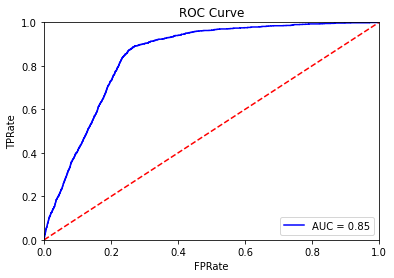

In [22]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt
roc_auc = auc(fpr, tpr)
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPRate')
plt.xlabel('FPRate')
plt.show()

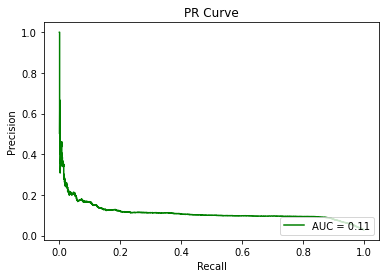

In [23]:
pr_auc = auc(recall, precision)
plt.title('PR Curve')
plt.plot(recall, precision, 'g', label = 'AUC = %0.2f' % pr_auc)
plt.legend(loc = 'lower right')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()